In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


df = pd.read_excel('iShares-iBoxx--Investment-Grade-Corporate-Bond-ETF_fund.xls', skiprows=7)

# shows all columns
pd.set_option('display.max_columns', None)
df.head()

,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Par Value,CUSIP,ISIN,SEDOL,Price,Location,Exchange,Currency,Duration,YTM (%),FX Rate,Maturity,Coupon (%),Mod. Duration,Yield to Call (%),Yield to Worst (%),Real Duration,Real YTM (%),Market Currency
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,6.347540e+08,1.09734,6.347540e+08,634754000,066922477,US0669224778,--,1.00,United States,--,USD,0.09,0.10,1,--,0.16,0.13,--,0.10,0.13,0.10,USD
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,1.780641e+08,0.30783,1.780641e+08,136538000,03522AAJ9,US03522AAJ97,BJXS2M9,130.29,United States,--,USD,15.73,3.16,1,"Feb 01, 2046",4.90,15.94,--,3.14,15.76,3.14,USD
2,GE CAPITAL INTERNATIONAL FUNDING C,Finance Companies,Fixed Income,1.729579e+08,0.29900,1.729579e+08,164076000,36164QNA2,US36164QNA21,BYNWXZ6,104.41,United States,--,USD,11.15,4.03,1,"Nov 15, 2035",4.42,11.04,--,4.03,11.04,4.03,USD
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,1.709580e+08,0.29554,1.709580e+08,120791000,126650CZ1,US126650CZ11,BF4JKH4,139.64,United States,--,USD,16.38,2.94,1,"Mar 25, 2048",5.05,16.68,--,2.92,16.51,2.92,USD
4,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,1.603515e+08,0.27721,1.603515e+08,132929000,126650CX6,US126650CX62,BF3V2P3,119.02,United States,--,USD,6.43,1.64,1,"Mar 25, 2028",4.30,6.55,--,1.56,6.36,1.56,USD


In [2]:
df['Maturity'] = df['Maturity'].str.replace('--','')
df['Maturity'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
df['Maturity']

0                NaN
1       Feb 01, 2046
2       Nov 15, 2035
3       Mar 25, 2048
4       Mar 25, 2028
            ...     
2297    Feb 12, 2045
2298    Mar 15, 2023
2299    Aug 15, 2045
2300    Mar 15, 2027
2301    Jan 17, 2023
Name: Maturity, Length: 2302, dtype: object

In [3]:
df['Maturity'] = pd.to_datetime(df['Maturity'],format='%b %d, %Y')


In [4]:
df['Maturity'].head()

0          NaT
1   2046-02-01
2   2035-11-15
3   2048-03-25
4   2028-03-25
Name: Maturity, dtype: datetime64[ns]

In [5]:
df.describe()

,Market Value,Weight (%),Notional Value,Par Value,Price,Duration,YTM (%),FX Rate,Coupon (%),Mod. Duration,Yield to Worst (%),Real Duration,Real YTM (%)
count,2.302000e+03,2302.000000,2.302000e+03,2.302000e+03,2302.000000,2302.000000,2302.000000,2302.0,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,2.512817e+07,0.043440,2.512817e+07,2.086077e+07,118.911008,9.379991,1.929774,1.0,3.909961,9.509327,1.891112,9.375886,1.891112
std,2.123235e+07,0.036706,2.123235e+07,1.872235e+07,13.936521,5.321316,0.994590,0.0,1.175247,5.402048,1.010878,5.391526,1.010878
min,1.598100e+02,0.000000,1.598100e+02,1.430000e+02,1.000000,0.000000,0.100000,1.0,0.000000,0.000000,0.100000,0.000000,0.100000
25%,1.479225e+07,0.025572,1.479225e+07,1.232925e+07,109.782500,4.772500,1.090000,1.0,3.200000,4.872500,1.020000,4.730000,1.020000
50%,2.043223e+07,0.035320,2.043223e+07,1.689450e+07,114.230000,7.660000,1.805000,1.0,3.850000,7.740000,1.750000,7.585000,1.750000
75%,3.030533e+07,0.052393,3.030533e+07,2.518025e+07,125.985000,14.522500,2.560000,1.0,4.500000,14.630000,2.540000,14.440000,2.540000
max,6.347540e+08,1.097340,6.347540e+08,6.347540e+08,183.160000,24.430000,7.110000,1.0,9.630000,25.180000,7.110000,24.990000,7.110000


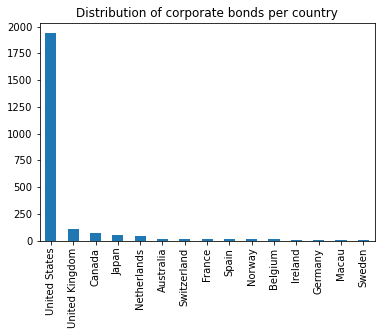

In [7]:
weight_series = df['Weight (%)']
asset_classes_series = df['Asset Class']
asset_classes_series.value_counts()
location_series = df['Location'].value_counts()
location_series

# Create a bar chart
location_series.plot.bar(label="", title="Distribution of corporate bonds per country");
plt.show(block=True);

In [24]:
df['Maturity'].dropna(axis=0, how='any', inplace=True)
longevity_list_in_years = []
for date in df['Maturity']:
    today_str = datetime.datetime.today()
    longevity = date - today_str
    longevity_int = (longevity.round(freq = 'D') / np.timedelta64(1, 'D'))
    longevity_list_in_years.append(int(longevity_int/365))
longevity_list_in_years
df.dropna(inplace=True)

In [9]:
df2 = pd.DataFrame({'longevity_in_years': longevity_list_in_years})
df_3 = df.join(df2)
df_3.dropna(inplace=True)
df_3.longevity_in_years.astype(int)
df_3.longevity_in_years.describe()

count    2298.000000
mean       12.738033
std         9.714611
min         1.000000
25%         5.000000
50%         9.000000
75%        21.000000
max        95.000000
Name: longevity_in_years, dtype: float64

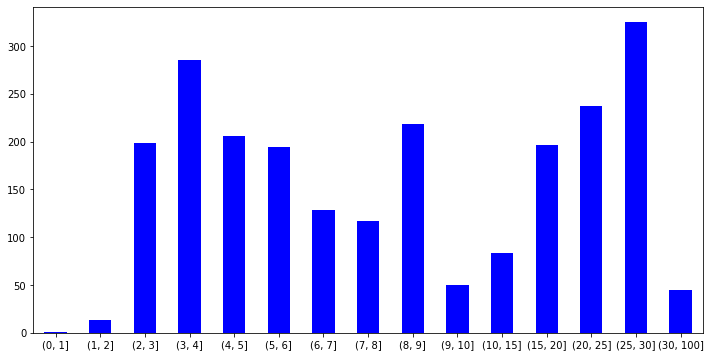

In [23]:
# Create a bar chart

out = pd.cut(df_3.longevity_in_years, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 100])
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,6))
plt.show();

In [28]:
df_3['Asset Class'].value_counts()

Fixed Income    2298
Name: Asset Class, dtype: int64

In [34]:
df_3['Notional Value'].sum()

57167231629.479996

In [ ]:
df_3['weighted_price_avg'] = df_3['Price'] * df_3['Weight (%)']
